In [51]:


import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io


# Image read and write/save image using [scikit-image](https://scikit-image.org/)

For installation please go through: https://scikit-image.org/docs/stable/user_guide/install.html

# <font color='red'>Warning: Please do not use the command sudo and pip together as pip may overwrite critical system libraries which may require you to reinstall your operating system.</font>


band1 image size: (512, 512)


c:\Users\DEBAYAN DATTA\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


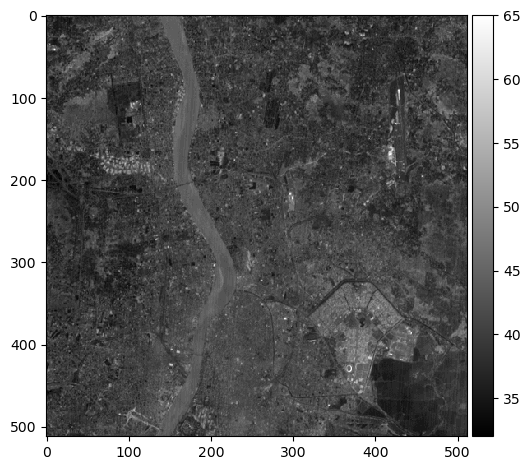

In [52]:
# IMAGE FILE NAME YOU WANT TO READ
img_filename = 'D:/RKMVERI/Sem2/ML/Assignment_4_kmeans/band1.gif'

#img = io.imread(img_filename).astype('double').mean(axis=2)
img = io.imread(img_filename).astype('double')

print('band1 image size: {}' .format(img.shape))

# DISPLAY
io.imshow(img, cmap='gray')
io.show()


In [53]:
B1 = plt.imread('band1.gif').astype('double').mean(axis=2)
B2 = plt.imread('band2.gif').astype('double').mean(axis=2)
B3 = plt.imread('band3.gif').astype('double').mean(axis=2)
B4 = plt.imread('band4.gif').astype('double').mean(axis=2)

In [54]:
print(B1)
print(B1.shape)

[[94.5  94.5  92.25 ... 94.5  94.5  94.5 ]
 [94.5  95.25 94.5  ... 96.75 94.5  94.5 ]
 [94.5  96.   93.   ... 95.25 93.75 93.75]
 ...
 [93.   92.25 92.25 ... 92.25 93.   91.5 ]
 [93.75 93.   93.75 ... 92.25 93.   91.5 ]
 [94.5  95.25 95.25 ... 92.25 92.25 91.5 ]]
(512, 512)


In [55]:
# intensity matrix: flattened all bands, and column stack applied

intensity_matrix = np.column_stack((B1.flatten(), B2.flatten(), B3.flatten(),B4.flatten()))

print(intensity_matrix.shape)  


(262144, 4)


## K means algorithm

In [81]:
# Find the euclidean distance of a single data point from all the centroids

def euclid_dist(centrs, datapoint):
    return np.sqrt(np.sum((centrs - datapoint)**2 , axis=1))

In [82]:
# Assign the datapoints to cluster numbers according to their closest centroid

def assign_cluster_labels(dataset, centrs):
    
    cluster_lbl=[]
    for point in dataset:
        distances = euclid_dist(centrs, point)
        cluster_num = np.argmin(distances)
        cluster_lbl.append(cluster_num)
    
    return cluster_lbl

In [83]:
# Put all the points having similar cluster num together 

def put_clusters_together(lbls,kval):
    
    indices_dict={}

    for i in range(kval):
        indices_dict[i]=[]

    for idx, value in enumerate(lbls):
        indices_dict[value].append(idx)


    clusters_together = list(indices_dict.values())

    return clusters_together


In [106]:
def kmeans_clustering(k, X, max_iteration):

    centroids = np.random.uniform(np.min(X), np.max(X), size=(k,X.shape[1]))
    #print("Centroids shape", centroids.shape)      
    cluster_label = []

    current_iteration=1
    while(current_iteration <= max_iteration):
       
        cluster_label = assign_cluster_labels(X, centroids)
        cluster_label = np.array(cluster_label)
        # [ lbl(x1,y1), lbl(x1,y2), ...]
        #print("Cluster labels", np.unique(cluster_label))

        cluster_points = put_clusters_together(cluster_label, k)
        cluster_points = np.array(cluster_points)
        # [ [indices where label=0], [indices where label=1], ...]
        #print(cluster_points)
        #print("Cluster_points:", cluster_points.shape,"\n")

        cluster_centres=np.empty((0, X.shape[1]))
        for c_i, coordinates in enumerate(cluster_points):              # c_i = cluster_i
            if len(coordinates)==0:
                #cluster_centres.append(centroids[c_i])
                new_c = np.random.uniform(np.min(X),np.max(X),size=(1,X.shape[1]))
                cluster_centres = np.vstack((cluster_centres, new_c))
            else:
                #print(X[coordinates].shape)
                centre_c_i = np.mean(X[coordinates],axis=0)
                #print("Centre is",centre_c_i)
                cluster_centres = np.vstack((cluster_centres, centre_c_i))

        cluster_centres = np.array(cluster_centres)
        #print("Cluster centres=",cluster_centres)
        #print("Clusters centres:",cluster_centres.shape)
        #print("Centroids",centroids.shape)


        if np.max(np.abs(centroids - cluster_centres)) < 0.001:
            break
        else:
            centroids = cluster_centres
        

        current_iteration += 1

    return cluster_label, centroids



## Now implementing kmeans on the intensity matrix 

### For many k values

C:\Users\DEBAYAN DATTA\AppData\Local\Temp\ipykernel_13544\3701734694.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cluster_points = np.array(cluster_points)


[0 1]


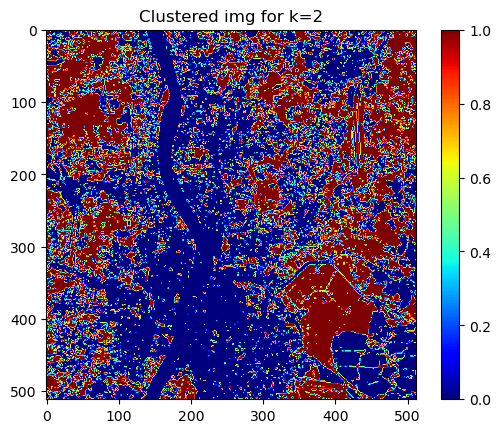

[0 1 2]


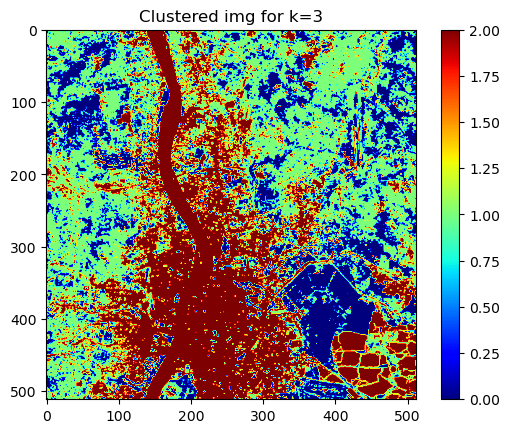

[0 1 2 3]


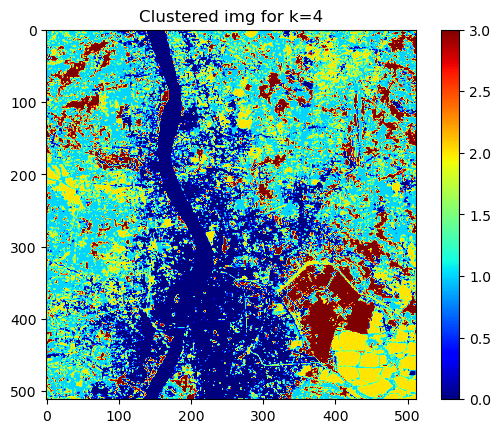

[0 1 2 3 4]


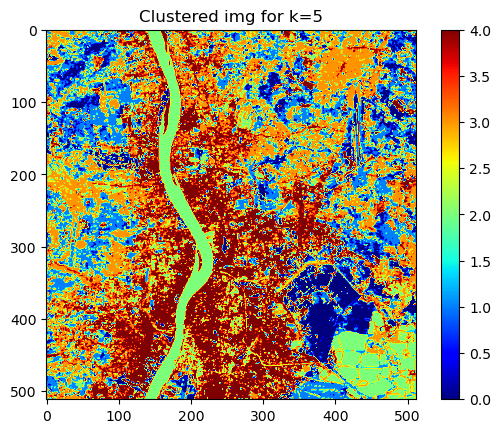

[0 1 2 3 4 5]


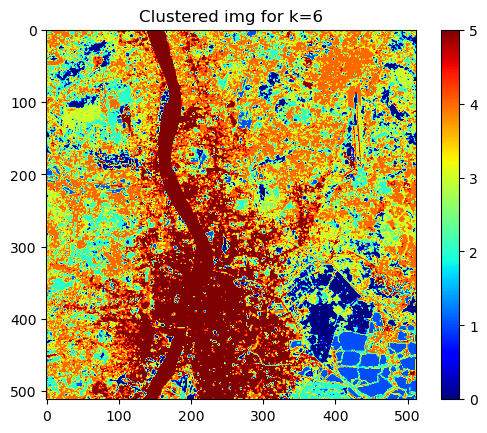

In [107]:
k_values=[2,3,4,5,6]
for k in k_values:
    labels, cents = kmeans_clustering(k, intensity_matrix, max_iteration=1800)
    print(np.unique(labels))
    
    clustered_label = np.zeros_like(B1)

    for i,cluster in enumerate(labels):
        clustered_label.flat[i] = cluster

    plt.figure()
    plt.imshow(clustered_label, cmap='jet')
    plt.title(f"Clustered img for k={k}")
    plt.colorbar()
    plt.show()


__________________